<a href="https://colab.research.google.com/github/parad13/EDA_ML/blob/main/Diabeties_EDA_ai_ML_honors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
1. Download dataset from google(UCI ML repository, Kaggle) in .csv format.
2. Find out which columns/variables are categorical(nominal & ordinal) and Numerical(Continuous & discrete).
3. Perform Univariate and Bivariate Analysis on Dataset.
4. Find out mean, median, mode on columns which you want to show.
5. Find out variance and standard deviation on any columns.
6. Find out Harmonic Mean on any columns.
7. Visualize data using Bar graph/ Histogram/Line graph/Scatter Plot whichever applicable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diab_df = pd.read_csv("diabetes2.csv")
df = diab_df

## Categorical & Numerical Columns Classification 

In [ ]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Catagorical Variables(Nominal & Ordinal) -> Outcome<br>
Numerical(Continuous & discrete) -> Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, 	                                Age	

# Univariate and Bivariate Analysis on Dataset.

## Univariate Analysis

In [ ]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diab_df.shape #768 rows & 9 cols, rows = index 

(768, 9)

In [ ]:
diab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Bivariate Analysis

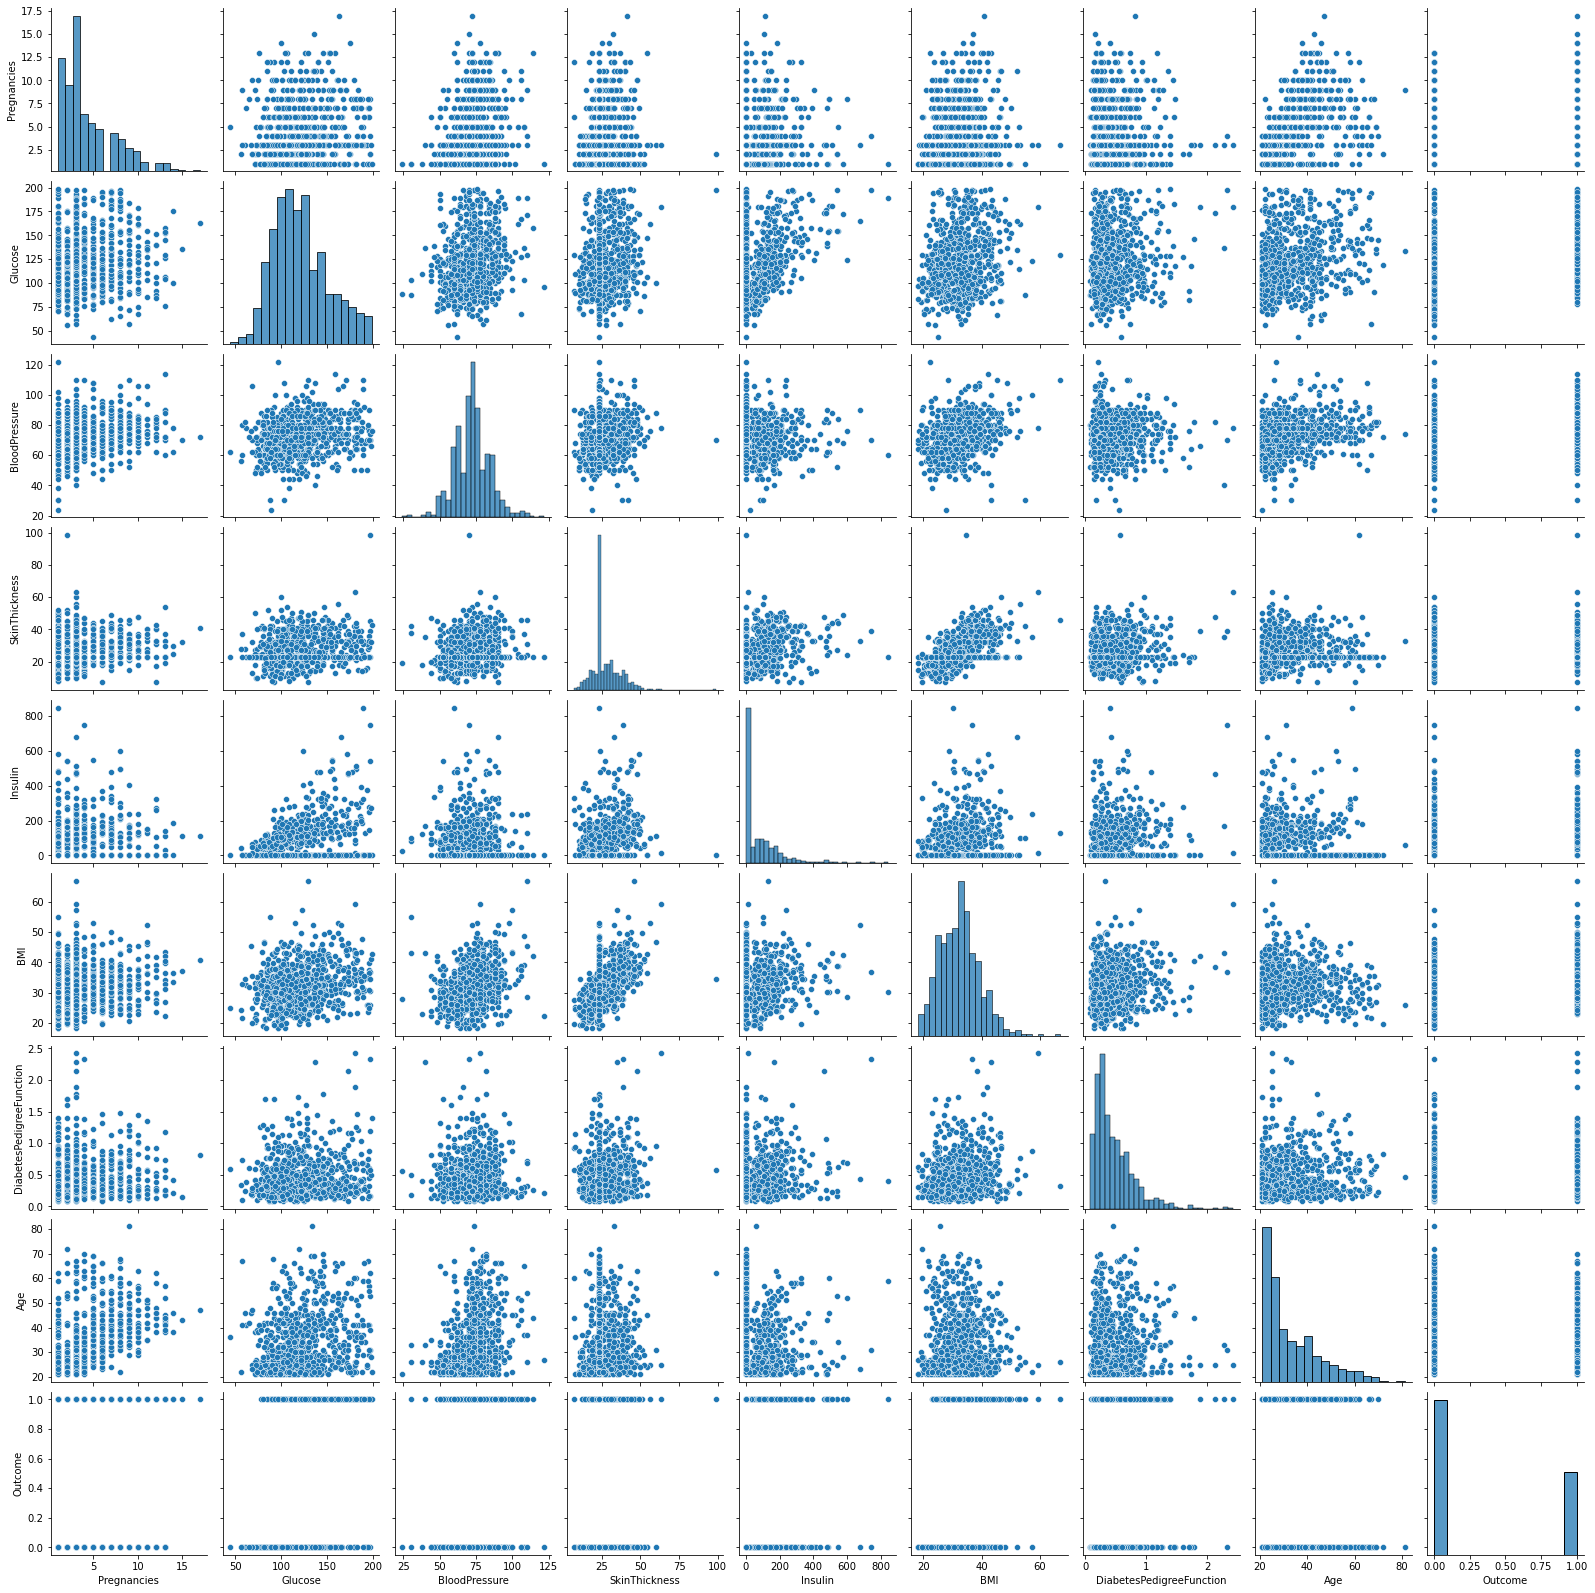

In [ ]:
sns.pairplot(df)

## mean, median, mode on columns which you want to show.

In [ ]:
df1 = df[['BloodPressure','BMI','Glucose']]
df1.describe()

,BloodPressure,BMI,Glucose
count,768.000000,768.000000,768.000000
mean,72.386719,32.450911,121.656250
std,12.096642,6.875366,30.438286
min,24.000000,18.200000,44.000000
25%,64.000000,27.500000,99.750000
50%,72.000000,32.000000,117.000000
75%,80.000000,36.600000,140.250000
max,122.000000,67.100000,199.000000


## Find out variance and standard deviation on any columns

In [ ]:
np.median(df1['BloodPressure']),np.median(df1['BMI']),np.median(df1['Glucose']) #same as 50 percentile

(72.0, 32.0, 117.0)

In [ ]:
np.std(df1['BloodPressure']),np.std(df1['BMI']),np.std(df1['Glucose']) #same as 50 percentile

(12.088763750899638, 6.870888861899679, 30.418462775166116)

## Find out Harmonic Mean on any columns

In [ ]:
import statistics as st
st.harmonic_mean(df['BMI'])

31.042532149433075

In [ ]:
missing_values = df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Series([], dtype: float64)

In [ ]:
# as part of eyeballing data we found there are 0 values in many columns, 
# let's find out how many 0 values are there in all columns
(df == 0).sum(0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df.head(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
#We will use 'median' to replace 0 for all columns except for 'Insulin' as diff between mean and median was big
df['Pregnancies'].replace(0,df['Pregnancies'].median(),inplace=True)
df['Glucose'].replace(0,df['Glucose'].median(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)
df['BMI'].replace(0,df['BMI'].median(),inplace=True)
df['Outcome'].replace(0,df['Outcome'].median(),inplace=True)

df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)

In [ ]:
(df==0).sum(0)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
(df[df['Outcome']==1]).sum(),(df[df['Outcome']==1]).sum()

(Pregnancies                  1418.000000
 Glucose                     38091.000000
 BloodPressure               20133.000000
 SkinThickness                7964.000000
 Insulin                     37902.328125
 BMI                          9482.200000
 DiabetesPedigreeFunction      147.534000
 Age                          9934.000000
 Outcome                       268.000000
 dtype: float64,
 Pregnancies                  1418.000000
 Glucose                     38091.000000
 BloodPressure               20133.000000
 SkinThickness                7964.000000
 Insulin                     37902.328125
 BMI                          9482.200000
 DiabetesPedigreeFunction      147.534000
 Age                          9934.000000
 Outcome                       268.000000
 dtype: float64)

In [ ]:
Outcome_0 = df[df['Outcome']==0]
Outcome_0.count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [ ]:
df.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


## Visualize data using Bar graph/ Histogram/Line graph/Scatter Plot whichever applicable.

<AxesSubplot:>

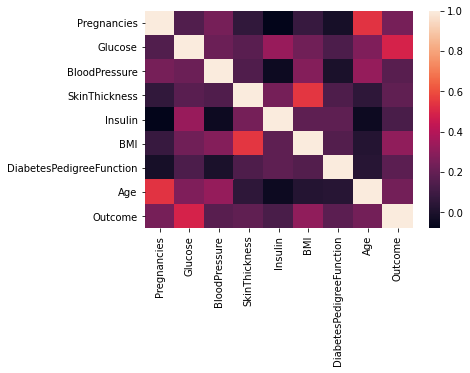

In [ ]:
#to check correlation use heatmap
sns.heatmap(df.corr())